In [42]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [43]:

# Function to normalize features
def  featureNormalize(data):
    # Calculate the mean and standard deviation of each feature
    nm = data.mean(axis=0)
    st = np.std(data, axis=0)
    # Normalize the data by subtracting the mean and dividing by the standard deviation
    data= (data- nm) / st
    return data,nm,st

In [44]:

# Function to normalize features
def  featureNormalize(data):
    # Calculate the mean and standard deviation of each feature
    nm = data.mean(axis=0)
    st = np.std(data, axis=0)
    # Normalize the data by subtracting the mean and dividing by the standard deviation
    data= (data- nm) / st
    return data,nm,st

In [45]:

# Function to calculate the variance retention for a given number of principal components
def varience_retention(k,S):
    retention=(np.sum(S[:k])/np.sum(S))
    return retention

In [46]:

# Principal Component Analysis (PCA) function
def pcm(data_raw):
    # Normalize the data and get mean and standard deviation
    data_norm,nm,st=featureNormalize(data_raw)
     # Compute the covariance matrix
    sigma=covariance(data_norm)
    # Perform Singular Value Decomposition (SVD)
    U, S, V = np.linalg.svd(sigma)
    return U,S,nm,st,data_norm

In [47]:

# Function to project data onto principal components
def  projectData(eigen,data):
    projected_Result=data.dot(eigen)
    return projected_Result

In [48]:

# Function to recover data from reduced dimensions
def recoverData(reduceddata,eigen):
    rec_dat=reduceddata.dot(eigen.T)
    return rec_dat

In [49]:

def display_data(X, example_width=None):
    # Set example_width automatically if not passed in
    if example_width is None:
        example_width = int(np.round(np.sqrt(X.shape[1])))

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Padding between images
    pad = 1

    # Create a blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),
                              pad + display_cols * (example_width + pad)))

    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            # Copy the patch
            max_val = np.max(np.abs(X[curr_ex, :]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          X[curr_ex, :].reshape(example_height, example_width) / max_val
            curr_ex += 1
        if curr_ex >= m:
            break

    # Display the image
    plt.imshow(display_array, cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

In [50]:

# Load the data from a .mat file (Make sure 'ex7faces.mat' exists in the current directory)
data_Face= scipy.io.loadmat('ex7faces.mat')

In [51]:

data_face_x = data_Face["X"]

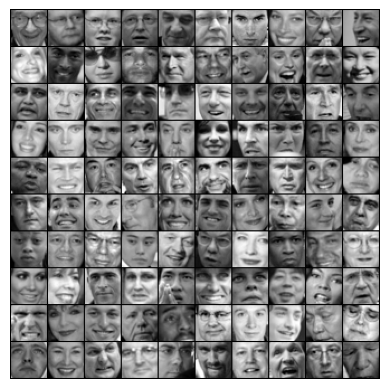

In [52]:

# Plot the original data points
display_data(data_face_x[0:100])

In [53]:

#normalizing features
normalised_face_data,nm_face,st_face=featureNormalize(data_face_x)

In [54]:

# Perform PCA and get principal components
U_face,S_face,nm_face,st_face,data_norm= pcm(data_face_x)

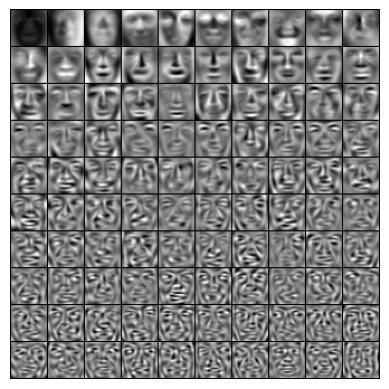

In [55]:

#displaying the Principal components on the face dataset
display_data(U_face[:, :100].T)

In [56]:

# Project data onto the first  100 principal component
result= projectData(U_face[:, :100],normalised_face_data)

In [57]:

# Recover the data back to the original space
recover_result=recoverData(result,U_face[:, :100])

orginal data


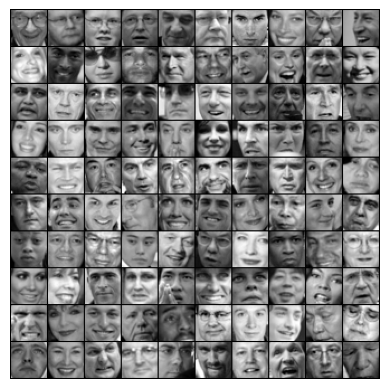

recovered  data


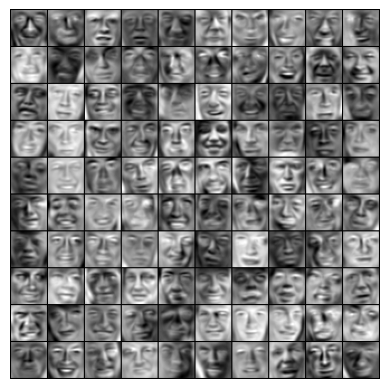

In [58]:

# Plot the original data points and recovered data
print("orginal data")
display_data(data_face_x[0:100]) 
print("recovered  data")
display_data(recover_result[ :100])
